In [4]:
import nlp_preprocessing
import numpy  as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import json

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/AdamHarris/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
data_path = r"/Users/AdamHarris/Documents/neuromatch_nlp/Neuromatch_NLP/dataset/"
json_path = r'/Users/AdamHarris/Documents/neuromatch_nlp/Neuromatch_NLP/dataset/nrc_en.json'
true_data = pd.read_csv(f"{data_path}True.csv")
true_data['label']=0

fake_data = pd.read_csv(f"{data_path}Fake.csv")
fake_data['label']=1

data_all = pd.concat([true_data, fake_data], ignore_index=True)


In [12]:
data_all

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [4]:
x = fake_data['text'][0]
print(x)
x = nlp_preprocessing.wp(x)
cleaned_stopwords = nlp_preprocessing.check_stopwords(json_path)
x = nlp_preprocessing.remove_stopwords(x, cleaned_stopwords)
print(x)

Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t eve

In [5]:
def preprocess_all(x):
    x = nlp_preprocessing.wp(x)
    cleaned_stopwords = nlp_preprocessing.check_stopwords(json_path)
    x = nlp_preprocessing.remove_stopwords(x, cleaned_stopwords)
    return x

In [6]:
preprocessed_text_all = [preprocess_all(i) for i in data_all['text']]


In [13]:
preprocessed_df = data_all.copy()

In [14]:
preprocessed_df['text']=preprocessed_text_all
   

In [19]:
true_preprocessed = preprocessed_df[preprocessed_df['label']==0].copy()
true_preprocessed.to_csv(r'/Users/AdamHarris/Documents/neuromatch_nlp/Neuromatch_NLP/dataset/true_preprocessed.csv')
fake_preprocessed = preprocessed_df[preprocessed_df['label']==1].copy()
fake_preprocessed.to_csv(r'/Users/AdamHarris/Documents/neuromatch_nlp/Neuromatch_NLP/dataset/fake_preprocessed.csv')

In [10]:
data_all.to_csv(r'/Users/AdamHarris/Documents/neuromatch_nlp/Neuromatch_NLP/dataset/preprocessed_data.csv')

# Playing around with NLCLex for emotion quantificaton

In [6]:
from nrclex import NRCLex

In [56]:
true_processed = pd.read_csv(f"{data_path}true_preprocessed.csv")
fake_processed = pd.read_csv(f"{data_path}fake_preprocessed.csv")
true_processed

,Unnamed: 0,title,text,subject,date,label
0,0,"As U.S. budget fight looms, Republicans flip t...",washington head conservative republican factio...,politicsNews,"December 31, 2017",0
1,1,U.S. military to accept transgender recruits o...,washington transgender people allowed first ti...,politicsNews,"December 29, 2017",0
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,washington special counsel investigation links...,politicsNews,"December 31, 2017",0
3,3,FBI Russia probe helped by Australian diplomat...,washington trump campaign adviser george papad...,politicsNews,"December 30, 2017",0
4,4,Trump wants Postal Service to charge 'much mor...,seattle washington president donald trump call...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...,...
21412,21412,'Fully committed' NATO backs new U.S. approach...,brussels nato allies tuesday welcomed presiden...,worldnews,"August 22, 2017",0
21413,21413,LexisNexis withdrew two products from Chinese ...,london lexisnexis provider legal regulatory bu...,worldnews,"August 22, 2017",0
21414,21414,Minsk cultural hub becomes haven from authorities,minsk shadow disused soviet era factories mins...,worldnews,"August 22, 2017",0
21415,21415,Vatican upbeat on possibility of Pope Francis ...,moscow vatican secretary state cardinal pietro...,worldnews,"August 22, 2017",0


In [57]:
test_article = true_processed['text'][0]
print(test_article)
norm_len = len(test_article)
xx = NRCLex(test_article)
norm_xx = {}
norm_xx_vect = []
for i in xx.raw_emotion_scores.keys():
    norm_xx[i]= xx.raw_emotion_scores[i]/norm_len
    norm_xx_vect.append(norm_xx[i])
dict_labels = list(xx.raw_emotion_scores.keys())
print(norm_xx_vect)
print(norm_xx)
print(dict_labels)

washington head conservative republican faction u congress voted month huge expansion national debt pay tax cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot way among republicans u representative mark meadows speaking cbs face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy even november congressional election campaigns approach republicans seek keep control congress president donald trump republicans want big budget increase military spending democrats also want proportional increases non defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration already willing say going increase non defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats saying enough need give

In [61]:
def emotion_score_article(article):
    if not isinstance(article, str):
        print(article)
    norm_len = len(article)
    xx = NRCLex(article)
    norm_xx = {}
    norm_xx_vect = []
    for i in xx.raw_emotion_scores.keys():
        norm_xx[i]= xx.raw_emotion_scores[i]/norm_len
        norm_xx_vect.append(norm_xx[i])
    return norm_xx_vect

In [62]:
fake_emotions = [emotion_score_article(i) for i in fake_processed['text']]
fake_processed['emotions']=fake_emotions
true_emotions = [emotion_score_article(i) for i in true_processed['text']]
true_processed['emotions']=true_emotions

nan


TypeError: object of type 'float' has no len()

In [ ]:
fake_processed.to 

In [43]:
with open(f'{data_path}emotions_labels.json', 'w') as f:
    json.dump(dict_labels, f)

disgust
trust
negative
sadness
anticipation
joy
positive
anger
fear
surprise
{'disgust': 0.06029544769369913, 'trust': 1.175761230027133, 'negative': 0.6933976484775399, 'sadness': 0.4522158577027434, 'anticipation': 0.42206813385589387, 'joy': 0.3316249623153452, 'positive': 1.4772384684956286, 'anger': 0.21103406692794693, 'fear': 0.36177268616219477, 'surprise': 0.3014772384684956}


In [24]:
type(xx)

dict

# Low-level article features: article and word length

In [4]:
lens = []
for i in true_data['text']:
    lens.append(len(i))


lens_fake = []
for i in fake_data['text']:
    lens_fake.append(len(i))

In [5]:
print(f'mean length of true_data is ')

mean length of true_data is 


/var/folders/fg/8ckmhq153z793vnzd_h_50s40000gn/T/ipykernel_97327/1808150185.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(lens, color='blue', shade=True, label='True')
/var/folders/fg/8ckmhq153z793vnzd_h_50s40000gn/T/ipykernel_97327/1808150185.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(lens_fake, color='red', shade=True, label='Fake')


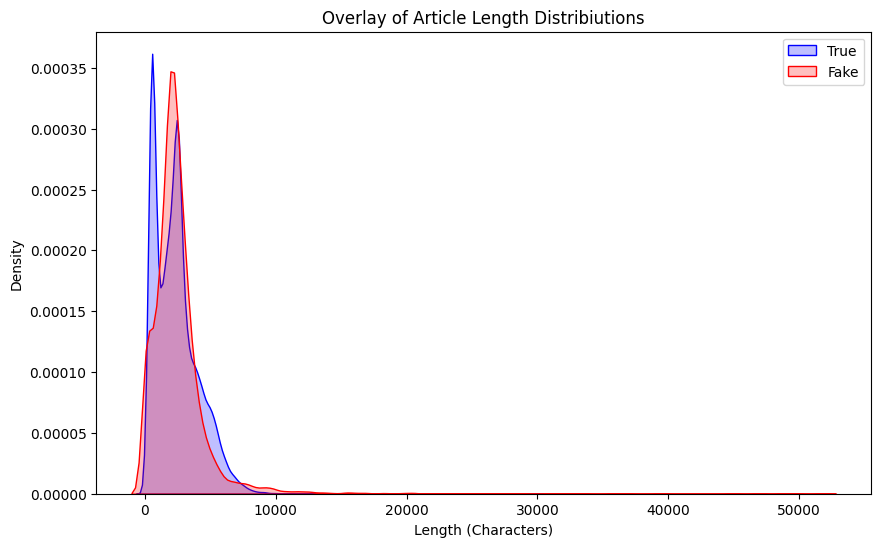

In [6]:
plt.figure(figsize=(10, 6))
sns.kdeplot(lens, color='blue', shade=True, label='True')
sns.kdeplot(lens_fake, color='red', shade=True, label='Fake')

# Adding labels and title
plt.xlabel('Length (Characters)')
plt.ylabel('Density')
plt.title('Overlay of Article Length Distribiutions')
plt.legend()

/Users/AdamHarris/miniconda3/envs/nlp_neuromatch/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/AdamHarris/miniconda3/envs/nlp_neuromatch/lib/python3.12/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/fg/8ckmhq153z793vnzd_h_50s40000gn/T/ipykernel_97327/471991120.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(wlens, color='blue', shade=True, label='True')
/var/folders/fg/8ckmhq153z793vnzd_h_50s40000gn/T/ipykernel_97327/471991120.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(wlens_fake, color='red', shade=True, label='Fak

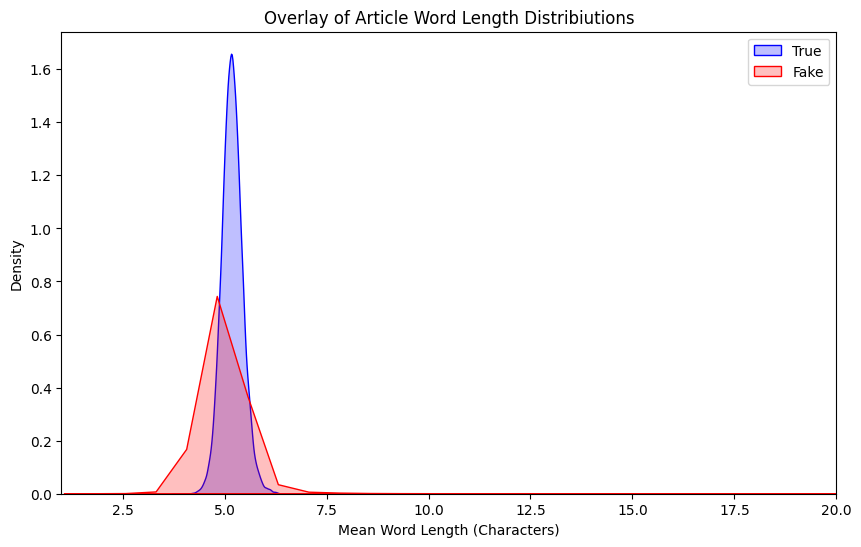

In [7]:
wlens = []
for i in true_data['text']:
    wlens.append(np.mean(np.array(nlp_preprocessing.get_word_lengths(i))))


wlens_fake = []
for i in fake_data['text']:
    wlens_fake.append(np.mean(np.array(nlp_preprocessing.get_word_lengths(i))))


plt.figure(figsize=(10, 6))
sns.kdeplot(wlens, color='blue', shade=True, label='True')
sns.kdeplot(wlens_fake, color='red', shade=True, label='Fake')

# Adding labels and title
plt.xlabel('Mean Word Length (Characters)')
plt.ylabel('Density')
plt.title('Overlay of Article Word Length Distribiutions')
plt.xlim(1, 20)
plt.legend()

In [29]:
vectorizer = CountVectorizer()

# Fit and transform the text data
X = vectorizer.fit_transform(data_all['title'])

In [31]:
feature_names = vectorizer.get_feature_names_out()

# Convert sparse matrix to DataFrame
word_count_df = pd.DataFrame(X.toarray(), columns=feature_names)

In [32]:
print(word_count_df.head())

   00  000  000m  000s  0045  0111  0112  0130  0149  02  ...  zor  zschaepe  \
0   0    0     0     0     0     0     0     0     0   0  ...    0         0   
1   0    0     0     0     0     0     0     0     0   0  ...    0         0   
2   0    0     0     0     0     0     0     0     0   0  ...    0         0   
3   0    0     0     0     0     0     0     0     0   0  ...    0         0   
4   0    0     0     0     0     0     0     0     0   0  ...    0         0   

   zucker  zuckerberg  zulia  zuma  zummar  zurich  état  žižek  
0       0           0      0     0       0       0     0      0  
1       0           0      0     0       0       0     0      0  
2       0           0      0     0       0       0     0      0  
3       0           0      0     0       0       0     0      0  
4       0           0      0     0       0       0     0      0  

[5 rows x 20896 columns]


In [33]:
feature_names[15000:16000]

array(['really', 'realnews', 'realtors', 'reap', 'reappeared',
       'reappoints', 'reason', 'reasonable', 'reasonably', 'reasoning',
       'reasons', 'reassess', 'reassigned', 'reassignment', 'reassurance',
       'reassure', 'reassures', 'reauthorizes', 'reauthorizing',
       'reawaken', 'rebates', 'rebel', 'rebellion', 'rebellious',
       'rebels', 'reboot', 'reborn', 'rebound', 'rebuff', 'rebuffed',
       'rebuffs', 'rebuild', 'rebuilding', 'rebuke', 'rebuked', 'rebukes',
       'rebuts', 'rebuttal', 'rec', 'recall', 'recalled', 'recalling',
       'recalls', 'recanvass', 'recapture', 'recaptured', 'recaptures',
       'recast', 'receipt', 'receipts', 'receive', 'received', 'receives',
       'receiving', 'recent', 'recently', 'reception', 'receptive',
       'recess', 'recession', 'recipe', 'recipient', 'recipients',
       'reciprocal', 'reciprocate', 'recite', 'recites', 'reckless',
       'recklessness', 'reckoning', 'reclaim', 'reclaiming', 'recode',
       'recognition',